In [4]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pymaster as nmt

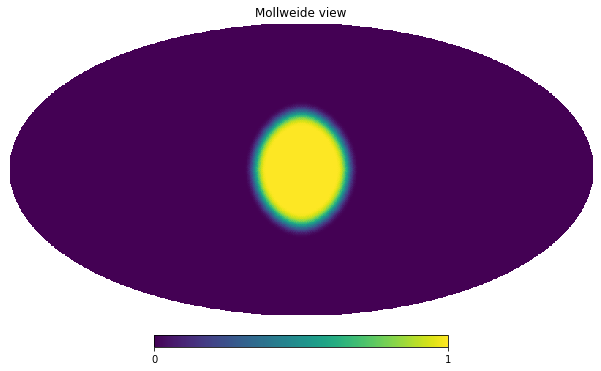

In [5]:
nside = 128
mask = np.zeros(hp.nside2npix(nside))
th, ph = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))

ph[np.where(ph > np.pi)[0]] -= 2 * np.pi

mask[np.where(np.sqrt(ph**2+((th-np.pi/2)/1)**2)<np.pi/5)[0]] = 1.
mask = nmt.mask_apodization(mask, 15, apotype='C1')

hp.mollview(mask)

In [50]:
f2 = nmt.NmtField(mask, hp.read_map('./input_maps/map_0.fits', field=[1, 2], verbose=False))
b = nmt.NmtBin.from_nside_linear(nside, 16, is_Dell=True)


/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


In [51]:
l, cltt, clee, clbb, clte = np.loadtxt('totcls_r001.txt', unpack=True)
cl_02_th = np.array([clee, np.zeros_like(clte), np.zeros_like(clte), clbb])

In [52]:
w = nmt.NmtWorkspace()
w.compute_coupling_matrix(f2, f2, b)

In [53]:
cl_02_th_binned = w.decouple_cell(w.couple_cell(cl_02_th))


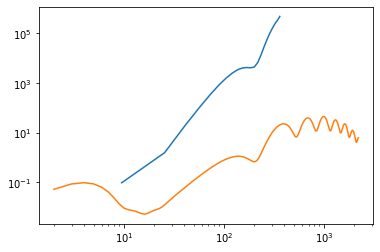

In [54]:
plt.loglog(b.get_effective_ells(), cl_02_th_binned[0])
plt.loglog(l, cl_02_th[0])
